In [3]:
# snippet for importing local modules
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
	sys.path.append(module_path)

# Семейства вероятностных распределений

In [4]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

from utils.summary_analysis import analysis, print_analysis


SIZE = 50


colors = ['r', 'g', 'b', 'c', 'y']
scales = [0.5, 1.0, 1.2, 1.5, 2.0]
dists = [
	np.random.exponential(size=SIZE, scale=scales[0]),
	np.random.exponential(size=SIZE, scale=scales[1]),
	np.random.exponential(size=SIZE, scale=scales[2]),
	np.random.exponential(size=SIZE, scale=scales[3]),
	np.random.exponential(size=SIZE, scale=scales[4]),
]

## Суммарный анализ

In [5]:
analyzes = list(map(analysis, dists))

for info in analyzes:
	print_analysis(info)

Количество = 50
Среднее значение = 0.5102715239713356
Медиана = 0.2594449014564024
Мода = 0.11991475412298737
Геометрическое среднее = 0.29021308034967147
Дисперсия = 0.27496008513792974
Стандартное отклонение = 0.5243663653762793
Стандартное ошибка = 0.07415660255674199
Минимальное значение = 0.04427063761434147
Максимальное значение = 2.304955908969859
Размах = 2.2606852713555177
Первый квартиль = 0.11715682735293256
Третий квартиль = 0.7637640620708102
Межквартильный размах = 0.6466072347178776
Ассиметрия = 1.5030250883006935
Куртоз = 2.1295163260953007
Коэффициент вариации = 1.0276222378533817
Сумма = 25.513576198566778
	
Количество = 50
Среднее значение = 1.1783854025068299
Медиана = 0.7777398666939248
Мода = 1.2274027756786636
Геометрическое среднее = 0.6232791080478209
Дисперсия = 1.8375068773360868
Стандартное отклонение = 1.3555467079138537
Стандартное ошибка = 0.19170325387619722
Минимальное значение = 0.02999204842655061
Максимальное значение = 6.848500990936812
Размах = 6.8

## CDF - Функция распределения

In [6]:
lt_data = {}
pd_data = {}
ut_data = {}
i_data = {}

indexes = [0.1, 1.0, 5.0, 10.0, 30.0]
coef = (SIZE - 1) / 30.0

for i in range(0, len(dists)):
	x = np.sort(dists[i])

	# для каждого индекса из массива индекса высчитывается
	# нужный элемент из массива исков, далее для него
	# вычисляются функция распределения и функция
	# плотности вероятности
	lt_data['dist{}'.format(i + 1)] = np.array([
		stats.expon.cdf(
			x[int(j * coef)], scale=scales[i]
		) for j in indexes
	])

	pd_data['dist{}'.format(i + 1)] = np.array([
		stats.expon.pdf(
			x[int(j * coef)], scale=scales[i]
		) for j in indexes
	])

	ut_data['dist{}'.format(i + 1)] =\
		1 - lt_data['dist{}'.format(i + 1)]

	i_data['dist{}'.format(i + 1)] = np.array([
		stats.expon.ppf(
			x[int(j * coef)], scale=scales[i]
		) for j in indexes
	])

l_df = pd.DataFrame(
	lt_data,
	index=indexes
)
p_df = pd.DataFrame(
	pd_data,
	index=indexes
)
u_df = pd.DataFrame(
	ut_data,
	index=indexes
)
i_df = pd.DataFrame(
	i_data,
	index=indexes
)

print('Lower Tail Area', l_df, sep='\n', end='\n\n')
print('Probability Mass', p_df, sep='\n', end='\n\n')
print('Upper Tail Area', u_df, sep='\n', end='\n\n')
print('Inverse CDF', i_df, sep='\n')

Lower Tail Area
         dist1     dist2     dist3     dist4     dist5
0.1   0.084735  0.029547  0.001000  0.007008  0.033852
1.0   0.088530  0.036381  0.013522  0.025520  0.039656
5.0   0.170554  0.152090  0.151845  0.172473  0.145142
10.0  0.244671  0.335372  0.299863  0.276071  0.272796
30.0  0.990047  0.998939  0.968986  0.998989  0.999641

Probability Mass
         dist1     dist2     dist3     dist4     dist5
0.1   1.830531  0.970453  0.832500  0.661995  0.483074
1.0   1.822939  0.963619  0.822065  0.649654  0.480172
5.0   1.658892  0.847910  0.706796  0.551685  0.427429
10.0  1.510658  0.664628  0.583448  0.482620  0.363602
30.0  0.019905  0.001061  0.025845  0.000674  0.000180

Upper Tail Area
         dist1     dist2     dist3     dist4     dist5
0.1   0.915265  0.970453  0.999000  0.992992  0.966148
1.0   0.911470  0.963619  0.986478  0.974480  0.960344
5.0   0.829446  0.847910  0.848155  0.827527  0.854858
10.0  0.755329  0.664628  0.700137  0.723929  0.727204
30.0  0.009953

### График

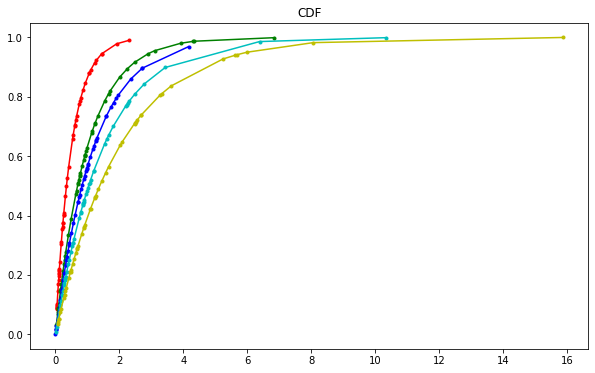

In [7]:
def cdf(data, scale, plot, color):
	plt.title('CDF')

	x = np.sort(data)
	y = stats.expon.cdf(x, scale=scale)

	plot.plot(x, y, '.', color=color)
	plot.plot(x, y, '-', color=color)


fig, ax = plt.subplots(figsize=(10,6))

for i in range(0, len(dists)):
	cdf(dists[i], scales[i], ax, colors[i])

## PPF - inverse CDF - Обратная функция распределения

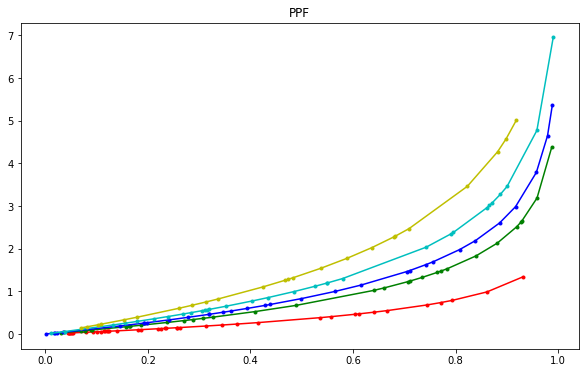

In [8]:
def ppf(data, scale, plot, color):
	plt.title('PPF')

	x = np.sort(data)
	y = stats.expon.ppf(x, scale=scale)

	plot.plot(x, y, '.', color=color)
	plot.plot(x, y, '-', color=color)


fig, ax = plt.subplots(figsize=(10,6))

for i in range(0, len(dists)):
	ppf(dists[i], scales[i], ax, colors[i])

## PDF - Функция плотности вероятности

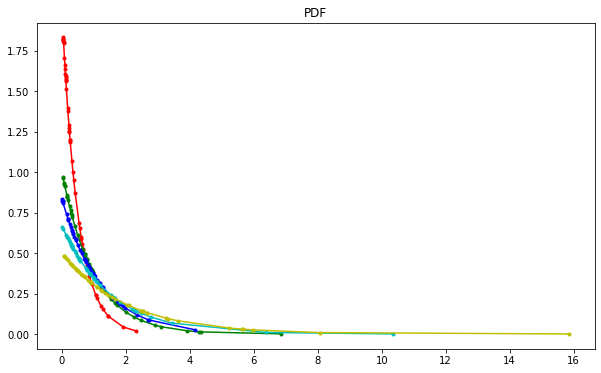

In [9]:
def pdf(data, scale, plot, color):
	plt.title('PDF')

	x = np.sort(data)
	y = stats.expon.pdf(x, scale=scale)

	plot.plot(x, y, '.', color=color)
	plot.plot(x, y, '-', color=color)


fig, ax = plt.subplots(figsize=(10,6))

for i in range(0, len(dists)):
	pdf(dists[i], scales[i], ax, colors[i])

## Survivor Function - Функция выжимаемости

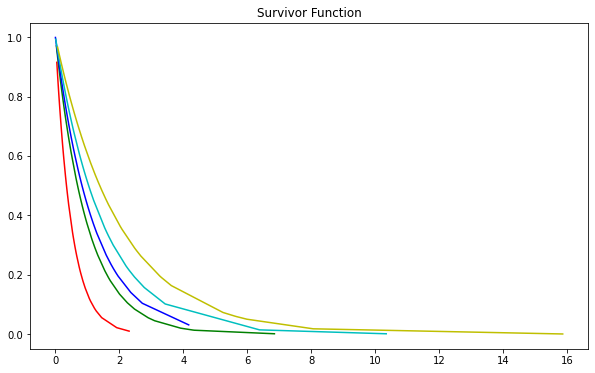

In [10]:
def sf(data, scale, plot, color):
	plt.title('Survivor Function')

	x = np.sort(data)
	y = stats.expon.sf(x, scale=scale)

	plot.plot(x, y, '-', color=color)


fig, ax = plt.subplots(figsize=(10,6))

for i in range(0, len(dists)):
	sf(dists[i], scales[i], ax, colors[i])

## Log Survivor Function - Логарифм функции выживаемости

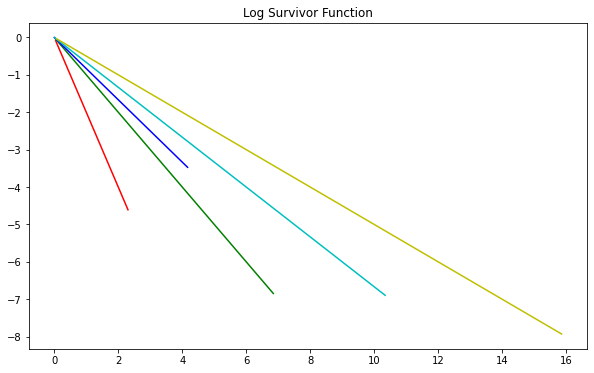

In [11]:
def logsf(data, scale, plot, color):
	plt.title('Log Survivor Function')

	x = np.sort(data)
	y = stats.expon.logsf(x, scale=scale)

	plot.plot(x, y, '-', color=color)


fig, ax = plt.subplots(figsize=(10,6))

for i in range(0, len(dists)):
	logsf(dists[i], scales[i], ax, colors[i])

## Hazard Function - Функция риска

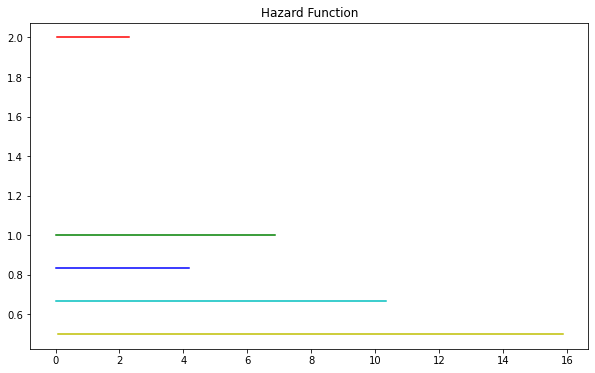

In [12]:
def hazard(data, scale, plot, color):
	plt.title('Hazard Function')

	x = np.sort(data)
	y1 = stats.expon.pdf(x, scale=scale)
	y2 = stats.expon.sf(x, scale=scale)

	y = y1 / y2

	plot.plot(x, y, '-', color=color)


fig, ax = plt.subplots(figsize=(10,6))

for i in range(0, len(dists)):
	hazard(dists[i], scales[i], ax, colors[i])